# Chainerでクラス分類

## データの読み込み

In [ ]:
# 必要ライブラリのインストール
!pip install chainer
!pip install numpy
!pip install pandas
!pip install matplotlib

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/wine-class.csv')

In [3]:
df.head(3)

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [4]:
df.tail(3)

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
175,3,13.27,2.26,20.0,120,1.59,0.69,0.43,10.2,0.59,835
176,3,13.17,2.37,20.0,120,1.65,0.68,0.53,9.3,0.60,840
177,3,14.13,2.74,24.5,96,2.05,0.76,0.56,9.2,0.61,560


今回は、一番左のクラスを予測するクラスを作成する。（1～3等級）  
『Alcohol』より右のデータを入力データとする。  
## 入力変数と教師データ（出力変数）に切り分ける

In [5]:
# df.iloc[行をどれくらい取るか, 列をどれくらい取るか]
# 教師データt
t = df.iloc[:, 0]  # 行は全てで列は0番目のみ
t

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

In [6]:
# 入力データx
x = df.iloc[:, 1:]  # 行は全てで、列は0以外の全て
x.head(3)

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [7]:
# 出来上がったデータのサイズを確認する。
x.shape

(178, 10)

## データをChainerで使えるように変換
DataFrame型をNumpyの型に変換

In [8]:
type(x)

pandas.core.frame.DataFrame

In [9]:
# Numpyの型にするために、『.value』を利用する。
type(x.values)

numpy.ndarray

In [10]:
t = t.values-1
x = x.values

t(教師データ）は1～3だが、Chainerでは、0～2にしなければならない。

In [11]:
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [12]:
t.dtype

dtype('int64')

In [13]:
x.dtype

dtype('float64')

入力と教師データを32Bitに変換

In [14]:
t = t.astype('i')
x = x.astype('f')

In [15]:
t.dtype

dtype('int32')

In [16]:
x.dtype

dtype('float32')

# ニューラルネットワークのモデルを定義

In [17]:
import chainer.functions as F
import chainer.links as L
import chainer

D:\Anaconda3\envs\Chainer\lib\site-packages\chainer\backends\cuda.py:98: UserWarning: cuDNN is not enabled.
Please reinstall CuPy after you install cudnn
(see https://docs-cupy.chainer.org/en/stable/install.html#install-cudnn).
  'cuDNN is not enabled.\n'


In [18]:
class NN(chainer.Chain):
    
    # モデルの構造
    def __init__(self):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(10, 5)
            self.fc2 = L.Linear(5, 3)
            
    # 順伝播
    def __call__(self, x):
        u1 = self.fc1(x)
        z1 = F.relu(u1)
        u2 = self.fc2(z1)
        return u2

### クラスの改良
クラス内にて直値でサイズを定義するのでは無く、可変で設定できるようにする。

In [19]:
class NN(chainer.Chain):
    
    # モデルの構造
    def __init__(self, n_mid_units=5, n_out=3):  # 中間層と出力層のはインスタンス化時に、引数として受けとる。
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, n_mid_units)  # Chainerは入力層を『None』にすると、自動で認識してくれる。
            self.fc2 = L.Linear(None, n_out)
            
    # 順伝播
    def __call__(self, x):
        h = self.fc1(x)  # 変数の確保を１つにする。
        h = F.relu(h)
        h = self.fc2(h)
        return h

## インスタンス化

シードの固定を忘れないようにする。

In [20]:
import numpy as np

In [21]:
np.random.seed(3)
nn = NN(n_mid_units=5, n_out=3)  # 引数は省略可能

モデルの学習方法等を管理するための、『Classifier』を利用する。

In [22]:
model = L.Classifier(nn)

## データセットの作成
Chainerで推奨されている形式に変換する必要がある。

データをタプルでかこう必要がある。"zip()"でできる。

そのデータをリストにする。

In [23]:
dateset = list(zip(x, t))

In [24]:
dateset

[(array([1.423e+01, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00, 3.060e+00,
         2.800e-01, 5.640e+00, 1.040e+00, 1.065e+03], dtype=float32), 0),
 (array([1.32e+01, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00, 2.76e+00,
         2.60e-01, 4.38e+00, 1.05e+00, 1.05e+03], dtype=float32), 0),
 (array([1.316e+01, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00, 3.240e+00,
         3.000e-01, 5.680e+00, 1.030e+00, 1.185e+03], dtype=float32), 0),
 (array([1.437e+01, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00, 3.490e+00,
         2.400e-01, 7.800e+00, 8.600e-01, 1.480e+03], dtype=float32), 0),
 (array([1.324e+01, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00, 2.690e+00,
         3.900e-01, 4.320e+00, 1.040e+00, 7.350e+02], dtype=float32), 0),
 (array([1.42e+01, 2.45e+00, 1.52e+01, 1.12e+02, 3.27e+00, 3.39e+00,
         3.40e-01, 6.75e+00, 1.05e+00, 1.45e+03], dtype=float32), 0),
 (array([1.439e+01, 2.450e+00, 1.460e+01, 9.600e+01, 2.500e+00, 2.520e+00,
         3.000e-01, 5.250e+00, 1.020e+00, 1.290e+03

## 訓練データと検証データに分割
Chainer内のものを使用する。

In [25]:
import chainer

In [26]:
# 全体サイズ
len(dateset)

178

In [27]:
# 学習データを7割にする。
n_train = int(len(dateset)*0.7)
n_train

124

In [28]:
# 今回のデータは整列されて格納されているため、『random』で分割することが重要である。
train, test = chainer.datasets.split_dataset_random(dateset, n_train, seed=1)  # シードを指定するのを忘れないようにする。

In [29]:
len(train)

124

In [30]:
len(test)

54

## 学習するための設定
  
  
#### Optimizerの設定

重みを最適化するアルゴリズムを選択する部分  
今回は、『確率的勾配降下法』を利用する。

In [31]:
optimizer = chainer.optimizers.SGD()  # 確率的勾配降下法

In [32]:
optimizer.setup(model)

#### Iteratorの設定
バッチサイズが重要になる  
  
- ミニバッチ学習  
データが100万有ると仮定した場合、  
『batchsize』を100に設定することで、  
『1epoch』（全データを１回使って学習）で  
『iteration』（パラメータの更新）が10000回  になる。
  


In [33]:
# データに応じてサイズを決定
batchsize = 10

In [34]:
# 学習とテスト用のIteratorを設定する。
train_iter = chainer.iterators.SerialIterator(train, batchsize)
# テストの設定をする。
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

## Updaterの設定
引数の『device』で使用するデバイスを設定する。
- CPU: -1
- GPU: 0～

※GPUは使用する準備を行ってから設定しなければならない。  
　GPU時の指定は、数字で使用するGPUの番号を指定する。

In [35]:
from chainer import training

In [36]:
updater = training.StandardUpdater(train_iter, optimizer, device=-1)

## TrainerとExtensionsの設定



In [37]:
from chainer.training import extensions

In [38]:
# epochの数
epoch = 50

In [39]:
# Trainerの宣言
# outは『Classifier』を利用している際に、出力されるログを保存するパスを記載する。
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result/wine')

In [40]:
# 検証データで評価
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))  # ここでも『device』の設定が必要

trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))  # ログ出力の頻度は１エポックごとに出力



1エポックごと（trigger）に
- trainデータに対するloss
- testデータに対するloss
- testデータに対するaccuracy（どれだけ正解したか？）
- 経過時間の出力
  
    

In [41]:
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy', 'main/loss', 'validation/main/loss', 'elapsed_time']), trigger=(1, 'epoch'))

# 設定の完了

# 学習の実行

In [42]:
trainer.run()

epoch       main/accuracy  validation/main/accuracy  main/loss   validation/main/loss  elapsed_time
1           0.392308       0.341667                  72.689      1.09851               0.0282038     
2           0.416667       0.341667                  1.09599     1.09857               0.0508741     
3           0.430769       0.341667                  1.09368     1.09868               0.0741135     
4           0.416667       0.341667                  1.09254     1.09885               0.0952662     
5           0.408333       0.341667                  1.09244     1.09902               0.118455      
6           0.407692       0.341667                  1.09246     1.0992                0.142554      
7           0.441667       0.341667                  1.08667     1.09956               0.164296      
8           0.407692       0.341667                  1.0896      1.09985               0.188189      
9           0.425          0.341667                  1.08773     1.10014            

訓練データに対しては40％近くになっている  
テストデータに対しては30％程  
→上手くいってない。

## 実行結果を確認する
出力したログファイルを読み込む

In [43]:
import json

In [44]:
with open('result/wine/log') as f:
    logs = json.load(f)

In [45]:
# 辞書型のリストになっている。
logs[0]

{'main/loss': 72.68901051924779,
 'main/accuracy': 0.39230769643416774,
 'validation/main/loss': 1.0985065698623657,
 'validation/main/accuracy': 0.34166667113701504,
 'epoch': 1,
 'iteration': 13,
 'elapsed_time': 0.02820381999999455}

In [46]:
# 辞書型なので、以下のようにアクセスできる
logs[0]['main/accuracy']

0.39230769643416774

辞書型のリストは扱いにくいので、Pandasを利用する。

In [47]:
results = pd.DataFrame(logs)

In [48]:
results.head()

,main/loss,main/accuracy,validation/main/loss,validation/main/accuracy,epoch,iteration,elapsed_time
0,72.689011,0.392308,1.098507,0.341667,1,13,0.028204
1,1.095988,0.416667,1.098565,0.341667,2,25,0.050874
2,1.093678,0.430769,1.098679,0.341667,3,38,0.074114
3,1.092542,0.416667,1.098854,0.341667,4,50,0.095266
4,1.092435,0.408333,1.099025,0.341667,5,62,0.118455


### 精度の部分の学習の状況を表示する。

In [49]:
results[['main/accuracy', 'validation/main/accuracy']].head()

,main/accuracy,validation/main/accuracy
0,0.392308,0.341667
1,0.416667,0.341667
2,0.430769,0.341667
3,0.416667,0.341667
4,0.408333,0.341667


### 上記のデータを可視化する
Pandas内で、matplotlibのグラフ描画を表示する事ができる。

In [50]:
# NoteBook上でグラフを表示するために。
%matplotlib inline

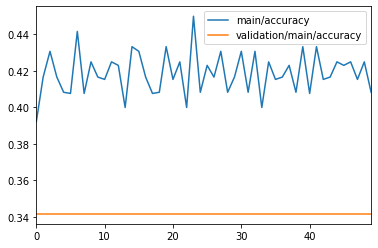

In [51]:
# 凡例も表示してくれている。
results[['main/accuracy', 'validation/main/accuracy']].plot()

学習に関しても上がったり、下がったり、している  
という事は、余り良い状態ではない。

### loss（損失関数）についても表示してみる

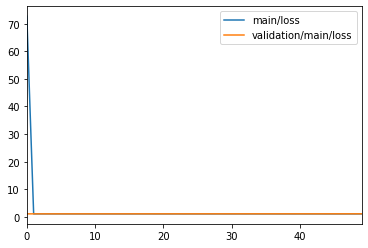

In [52]:
results[['main/loss', 'validation/main/loss']].plot()

一応下がってるが、精度としては上手くいっていない。  
実運用できる精度ではない。

### 精度向上について
今のモデルより、精度がいい物を作ろう！！  
  
精度を向上させる為のポイント  

- 入力層の数を増やす
- 中間層を増やす
- optimizerの設定を変更する
- エポックを増やす
- 活性化関数の変更

ハイパーパラメータを調整する

# ニューラルネットワークのモデルを定義（改良版）

In [53]:
import chainer.functions as F
import chainer.links as L
import chainer

In [87]:
class NN(chainer.Chain):
    
    # モデルの構造
    def __init__(self, n_mid_units1=100, n_mid_units2=80, n_mid_units3=50, n_out=3):  # 中間層と出力層のはインスタンス化時に、引数として受けとる。
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, n_mid_units1)  # Chainerは入力層を『None』にすると、自動で認識してくれる。
            self.fc2 = L.Linear(None, n_mid_units2)
            self.fc3 = L.Linear(None, n_mid_units3)
            self.fc4 = L.Linear(None, n_out)
            
    # 順伝播
    def __call__(self, x):
        h = self.fc1(x)  # 変数の確保を１つにする。
        h = F.relu(h)
        h = self.fc2(h)
        h = F.relu(h)
        h = self.fc3(h)
        h = F.relu(h)
        h = self.fc4(h)
        return h

## インスタンス化

シードの固定を忘れないようにする。

In [88]:
import numpy as np

In [89]:
np.random.seed(3)
nn = NN()  # 引数は省略可能

モデルの学習方法等を管理するための、『Classifier』を利用する。

In [90]:
model = L.Classifier(nn)

## データセットの作成
Chainerで推奨されている形式に変換する必要がある。

データをタプルでかこう必要がある。"zip()"でできる。

そのデータをリストにする。

In [91]:
dateset = list(zip(x, t))

In [92]:
dateset

[(array([1.423e+01, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00, 3.060e+00,
         2.800e-01, 5.640e+00, 1.040e+00, 1.065e+03], dtype=float32), 0),
 (array([1.32e+01, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00, 2.76e+00,
         2.60e-01, 4.38e+00, 1.05e+00, 1.05e+03], dtype=float32), 0),
 (array([1.316e+01, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00, 3.240e+00,
         3.000e-01, 5.680e+00, 1.030e+00, 1.185e+03], dtype=float32), 0),
 (array([1.437e+01, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00, 3.490e+00,
         2.400e-01, 7.800e+00, 8.600e-01, 1.480e+03], dtype=float32), 0),
 (array([1.324e+01, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00, 2.690e+00,
         3.900e-01, 4.320e+00, 1.040e+00, 7.350e+02], dtype=float32), 0),
 (array([1.42e+01, 2.45e+00, 1.52e+01, 1.12e+02, 3.27e+00, 3.39e+00,
         3.40e-01, 6.75e+00, 1.05e+00, 1.45e+03], dtype=float32), 0),
 (array([1.439e+01, 2.450e+00, 1.460e+01, 9.600e+01, 2.500e+00, 2.520e+00,
         3.000e-01, 5.250e+00, 1.020e+00, 1.290e+03

## 訓練データと検証データに分割
Chainer内のものを使用する。

In [93]:
import chainer

In [94]:
# 全体サイズ
len(dateset)

178

In [95]:
# 学習データを7割にする。
n_train = int(len(dateset)*0.7)
n_train

124

In [96]:
# 今回のデータは整列されて格納されているため、『random』で分割することが重要である。
train, test = chainer.datasets.split_dataset_random(dateset, n_train, seed=1)  # シードを指定するのを忘れないようにする。

In [97]:
len(train)

124

In [98]:
len(test)

54

## 学習するための設定
  
  
#### Optimizerの設定

重みを最適化するアルゴリズムを選択する部分  
今回は、『確率的勾配降下法』を利用する。

In [99]:
optimizer = chainer.optimizers.Adam()

In [100]:
optimizer.setup(model)

#### Iteratorの設定
バッチサイズが重要になる  
  
- ミニバッチ学習  
データが100万有ると仮定した場合、  
『batchsize』を100に設定することで、  
『1epoch』（全データを１回使って学習）で  
『iteration』（パラメータの更新）が10000回  になる。
  


In [101]:
# データに応じてサイズを決定
batchsize = 10

In [102]:
# 学習とテスト用のIteratorを設定する。
train_iter = chainer.iterators.SerialIterator(train, batchsize)
# テストの設定をする。
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

## Updaterの設定
引数の『device』で使用するデバイスを設定する。
- CPU: -1
- GPU: 0～

※GPUは使用する準備を行ってから設定しなければならない。  
　GPU時の指定は、数字で使用するGPUの番号を指定する。

In [103]:
from chainer import training

In [104]:
updater = training.StandardUpdater(train_iter, optimizer, device=-1)

## TrainerとExtensionsの設定



In [105]:
from chainer.training import extensions

In [106]:
# epochの数
epoch = 500

In [107]:
# Trainerの宣言
# outは『Classifier』を利用している際に、出力されるログを保存するパスを記載する。
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result/wine')

In [108]:
# 検証データで評価
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))  # ここでも『device』の設定が必要

trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))  # ログ出力の頻度は１エポックごとに出力



1エポックごと（trigger）に
- trainデータに対するloss
- testデータに対するloss
- testデータに対するaccuracy（どれだけ正解したか？）
- 経過時間の出力
  
    

In [109]:
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy', 'main/loss', 'validation/main/loss', 'elapsed_time']), trigger=(1, 'epoch'))

# 設定の完了

# 学習の実行

In [110]:
trainer.run()

epoch       main/accuracy  validation/main/accuracy  main/loss   validation/main/loss  elapsed_time
1           0.415385       0.408333                  11.7659     2.08349               0.0632121     
2           0.483333       0.55                      1.94642     1.85287               0.108036      
3           0.615385       0.516667                  1.1097      1.29756               0.166575      
4           0.516667       0.566667                  1.95282     2.11433               0.212347      
5           0.533333       0.675                     2.83484     1.1874                0.261582      
6           0.6            0.55                      2.15843     1.70172               0.304248      
7           0.625          0.575                     1.49283     0.997277              0.347337      
8           0.592308       0.566667                  1.56808     1.68033               0.391145      
9           0.616667       0.55                      1.17152     1.16915            

81          0.869231       0.9                       0.299472    0.391776              4.16834       
82          0.825          0.916667                  0.611644    0.412506              4.21992       
83          0.830769       0.7                       0.506989    0.920496              4.27186       
84          0.8            0.883333                  0.622993    0.69183               4.32875       
85          0.808333       0.666667                  0.621488    0.946975              4.38714       
86          0.815385       0.883333                  0.514753    0.454486              4.44701       
87          0.75           0.791667                  0.757426    0.390503              4.50236       
88          0.807692       0.85                      0.707772    0.375738              4.56483       
89          0.883333       0.866667                  0.37117     0.667175              4.61563       
90          0.891667       0.9                       0.392637    0.602006         

162         0.941667       0.683333                  0.158332    0.931093              8.64299       
163         0.761538       0.916667                  0.757307    0.283601              8.71141       
164         0.866667       0.933333                  0.369465    0.240121              8.7711        
165         0.916667       0.916667                  0.223278    0.220241              8.82942       
166         0.892308       0.916667                  0.266298    0.22099               8.89286       
167         0.916667       0.866667                  0.350238    0.303539              8.9501        
168         0.915385       0.933333                  0.298431    0.170714              9.01948       
169         0.916667       0.933333                  0.289119    0.170987              9.07238       
170         0.908333       0.916667                  0.399738    0.189909              9.12904       
171         0.876923       0.883333                  0.397606    0.305687         

243         0.961538       0.716667                  0.123621    0.567409              13.2499       
244         0.841667       0.65                      0.312519    1.45441               13.316        
245         0.933333       0.7                       0.202099    0.717201              13.38         
246         0.9            0.683333                  0.268594    0.932753              13.4496       
247         0.875          0.758333                  0.316129    0.531448              13.5102       
248         0.884615       0.683333                  0.301483    1.12026               13.5793       
249         0.908333       0.916667                  0.284283    0.233424              13.643        
250         0.933333       0.95                      0.186693    0.174091              13.7092       
251         0.930769       0.916667                  0.144677    0.246126              13.7737       
252         0.958333       0.933333                  0.118527    0.192692         

324         0.916667       0.791667                  0.258916    0.642925              18.2556       
325         0.833333       0.916667                  0.447067    0.202288              18.3267       
326         0.884615       0.916667                  0.314494    0.24668               18.3921       
327         0.891667       0.791667                  0.310962    0.518524              18.4565       
328         0.792308       0.666667                  0.720274    1.31859               18.5248       
329         0.775          0.65                      0.970413    2.13995               18.5884       
330         0.891667       0.866667                  0.300826    0.303579              18.6506       
331         0.946154       0.933333                  0.147825    0.117437              18.7147       
332         0.916667       0.883333                  0.190477    0.229885              18.7763       
333         0.907692       0.966667                  0.258051    0.128737         

405         0.958333       0.75                      0.116639    0.509442              23.5442       
406         0.953846       0.791667                  0.139104    0.330011              23.6137       
407         0.925          0.866667                  0.150402    0.367419              23.6769       
408         0.976923       0.916667                  0.128596    0.247514              23.7434       
409         0.975          0.9                       0.111196    0.273701              23.8147       
410         0.975          0.9                       0.112953    0.278665              23.888        
411         0.946154       0.775                     0.124895    0.462579              23.9555       
412         0.916667       0.833333                  0.228068    0.380811              24.0257       
413         0.9            0.933333                  0.233241    0.233596              24.0874       
414         0.85           0.933333                  0.460529    0.253526         

486         0.961538       0.95                      0.103591    0.155147              29.2029       
487         0.966667       0.966667                  0.0934997   0.140342              29.2793       
488         0.969231       0.9                       0.0835837   0.280936              29.3543       
489         0.933333       0.875                     0.105759    0.198824              29.4229       
490         0.95           0.766667                  0.177936    0.448869              29.5071       
491         0.938462       0.933333                  0.115576    0.11826               29.5895       
492         0.925          0.808333                  0.135884    0.511909              29.6689       
493         0.938462       0.95                      0.112663    0.118925              29.7473       
494         0.933333       0.95                      0.162607    0.110317              29.8225       
495         0.958333       0.933333                  0.0938741   0.195147         

訓練データに対しては93％近くになっている  
テストデータに対しても93％程  
上手くいっている。

## 実行結果を確認する
出力したログファイルを読み込む

In [111]:
import json

In [112]:
with open('result/wine/log') as f:
    logs = json.load(f)

辞書型のリストは扱いにくいので、Pandasを利用する。

In [113]:
results = pd.DataFrame(logs)

### 精度の部分の学習の状況を表示する。

In [114]:
# NoteBook上でグラフを表示するために。
%matplotlib inline

In [115]:
# 凡例も表示してくれている。
results[['main/accuracy', 'validation/main/accuracy']].head()

,main/accuracy,validation/main/accuracy
0,0.415385,0.408333
1,0.483333,0.550000
2,0.615385,0.516667
3,0.516667,0.566667
4,0.533333,0.675000


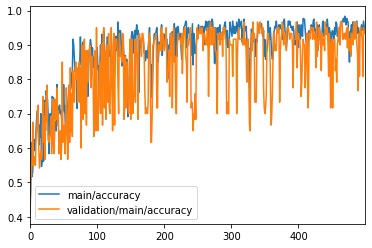

In [116]:
# 凡例も表示してくれている。
results[['main/accuracy', 'validation/main/accuracy']].plot()

### loss（損失関数）についても表示してみる

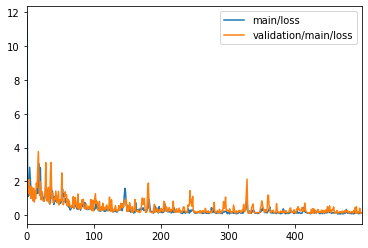

In [117]:
results[['main/loss', 'validation/main/loss']].plot()

一応下がってるが、精度としては上手くいっていない。  
実運用できる精度ではない。

# 実務でもよく使うものについて
バッチノーマリゼーション  
バッチごとに標準化を行う  
- 標準化 → 平均0・標準偏差1にする  
  
今回のケースはとても精度が向上した。

In [118]:
class NN(chainer.Chain):
    
    # モデルの構造
    def __init__(self, n_mid_units=5, n_out=3):  # 中間層と出力層のはインスタンス化時に、引数として受けとる。
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(None, n_mid_units)  # Chainerは入力層を『None』にすると、自動で認識してくれる。
            self.fc2 = L.Linear(None, n_out)
            # Batch Normalization
            self.bn = L.BatchNormalization(10)  # 追記
            
    # 順伝播
    def __call__(self, x):
        h = self.bn(x)
        h = self.fc1(h)  # 変数の確保を１つにする。
        h = F.relu(h)
        h = self.fc2(h)
        return h

## インスタンス化

シードの固定を忘れないようにする。

In [119]:
import numpy as np

In [120]:
np.random.seed(3)
nn = NN(n_mid_units=5, n_out=3)  # 引数は省略可能

モデルの学習方法等を管理するための、『Classifier』を利用する。

In [121]:
model = L.Classifier(nn)

## データセットの作成
Chainerで推奨されている形式に変換する必要がある。

データをタプルでかこう必要がある。"zip()"でできる。

そのデータをリストにする。

In [122]:
dateset = list(zip(x, t))

## 訓練データと検証データに分割
Chainer内のものを使用する。

In [123]:
import chainer

In [124]:
# 学習データを7割にする。
n_train = int(len(dateset)*0.7)
n_train

124

In [125]:
# 今回のデータは整列されて格納されているため、『random』で分割することが重要である。
train, test = chainer.datasets.split_dataset_random(dateset, n_train, seed=1)  # シードを指定するのを忘れないようにする。

## 学習するための設定
  
  
#### Optimizerの設定

重みを最適化するアルゴリズムを選択する部分  
今回は、『確率的勾配降下法』を利用する。

In [126]:
optimizer = chainer.optimizers.SGD()  # 確率的勾配降下法

In [127]:
optimizer.setup(model)

#### Iteratorの設定
バッチサイズが重要になる  
  
- ミニバッチ学習  
データが100万有ると仮定した場合、  
『batchsize』を100に設定することで、  
『1epoch』（全データを１回使って学習）で  
『iteration』（パラメータの更新）が10000回  になる。
  


In [128]:
# データに応じてサイズを決定
batchsize = 10

In [129]:
# 学習とテスト用のIteratorを設定する。
train_iter = chainer.iterators.SerialIterator(train, batchsize)
# テストの設定をする。
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

## Updaterの設定
引数の『device』で使用するデバイスを設定する。
- CPU: -1
- GPU: 0～

※GPUは使用する準備を行ってから設定しなければならない。  
　GPU時の指定は、数字で使用するGPUの番号を指定する。

In [130]:
from chainer import training

In [131]:
updater = training.StandardUpdater(train_iter, optimizer, device=-1)

## TrainerとExtensionsの設定



In [132]:
from chainer.training import extensions

In [133]:
# epochの数
epoch = 50

In [134]:
# Trainerの宣言
# outは『Classifier』を利用している際に、出力されるログを保存するパスを記載する。
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result/wine')

In [135]:
# 検証データで評価
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))  # ここでも『device』の設定が必要

trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))  # ログ出力の頻度は１エポックごとに出力

1エポックごと（trigger）に
- trainデータに対するloss
- testデータに対するloss
- testデータに対するaccuracy（どれだけ正解したか？）
- 経過時間の出力
  
    

In [136]:
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy', 'main/loss', 'validation/main/loss', 'elapsed_time']), trigger=(1, 'epoch'))

# 設定の完了

# 学習の実行

In [137]:
trainer.run()

epoch       main/accuracy  validation/main/accuracy  main/loss   validation/main/loss  elapsed_time
1           0.346154       0.325                     1.21069     2.05515               0.0889319     
2           0.458333       0.341667                  1.07995     1.1645                0.115479      
3           0.461538       0.491667                  1.02054     1.02466               0.144803      
4           0.541667       0.591667                  0.96666     0.969563              0.171898      
5           0.566667       0.608333                  0.927429    0.925309              0.198827      
6           0.646154       0.625                     0.891625    0.873216              0.226226      
7           0.6            0.641667                  0.895698    0.833839              0.253571      
8           0.669231       0.658333                  0.821431    0.814351              0.282601      
9           0.7            0.675                     0.779918    0.773943           

バッチノーマライゼーションをするだけで相当精度が向上した。

## 実行結果を確認する
出力したログファイルを読み込む

In [138]:
import json

In [139]:
with open('result/wine/log') as f:
    logs = json.load(f)

In [140]:
results = pd.DataFrame(logs)

### 精度の部分の学習の状況を表示する。

In [141]:
results[['main/accuracy', 'validation/main/accuracy']].head()

,main/accuracy,validation/main/accuracy
0,0.346154,0.325000
1,0.458333,0.341667
2,0.461538,0.491667
3,0.541667,0.591667
4,0.566667,0.608333


### 上記のデータを可視化する
Pandas内で、matplotlibのグラフ描画を表示する事ができる。

In [142]:
# NoteBook上でグラフを表示するために。
%matplotlib inline

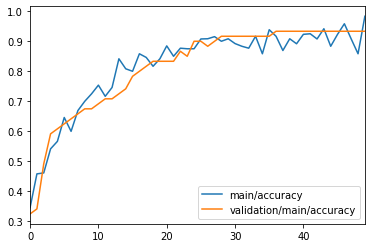

In [143]:
# 凡例も表示してくれている。
results[['main/accuracy', 'validation/main/accuracy']].plot()

学習に関しても上がったり、下がったり、している  
という事は、余り良い状態ではない。

### loss（損失関数）についても表示してみる

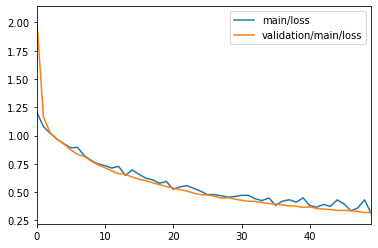

In [144]:
results[['main/loss', 'validation/main/loss']].plot()

## バッチノーマリゼーションの考察
下記のデータを見ればわかるが、入力変数のスケール間が変数によってだいぶ差がある。  
このようなデータの場合、上手く学習できない場合が多い！  
そこで、バッチノーマリゼーションをかけると、データの偏りが解消され、精度が向上する。  

In [146]:
df.iloc[:,1:].head()

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185
3,14.37,2.50,16.8,113,3.85,3.49,0.24,7.80,0.86,1480
4,13.24,2.87,21.0,118,2.80,2.69,0.39,4.32,1.04,735


# 学習済みモデルを保存

In [147]:
model

In [150]:
# ルートフォルダに『wine』というフォルダを追加してください。
chainer.serializers.save_npz('models/wine.npz', model)

## 学習済みモデルを使用した推論（予測値の計算）
### 学習済みモデルのロード
先にモデルの構造を明示する必要がある。

In [151]:
# モデルの構造を明示
model = L.Classifier(NN())

In [152]:
# 第２引数の中に、パスのモデルを読み込む
chainer.serializers.load_npz('models/wine.npz', model)

### 予測値の計算
今回は、一番最初のサンプルに対する予測値の計算を行う。

In [154]:
x_new = x[0]

In [155]:
x_new.shape

(10,)

In [156]:
# 予測値の計算
y = model.predictor(x_new)

InvalidType: 
Invalid operation is performed in: BatchNormalization (Forward)

Expect: in_types[1].ndim == 0
Actual: 1 != 0

Chainerで推論を行う際は、`（バッチサイズ, 入力変数の数）`という形式でなければならない。  
今回は、`(1, 10)`の形式が望ましい。

In [157]:
x_new = x_new[np.newaxis]

In [159]:
x_new.shape

(1, 10)

上記の処理で、`(1, 10)`の形式になったので、推論できる。

In [160]:
y = model.predictor(x_new)

D:\Anaconda3\envs\Chainer\lib\site-packages\chainer\functions\normalization\batch_normalization.py:114: UserWarning: A batch with no more than one sample has been given to F.batch_normalization. F.batch_normalization will always output a zero tensor for such batches. This could be caused by incorrect configuration in your code (such as running evaluation while chainer.config.train=True), but could also happen in the last batch of training if non-repeating iterator is used.
  UserWarning)


In [161]:
y

variable([[-0.18093558,  0.84641486, -0.44347715]])

### 出力の整形
出力は、そのままじゃ使用しづらいので、３つの出力が足して１になるように、整形する必要がある。

In [162]:
y = F.softmax(y)
y

variable([[0.21916616, 0.6122744 , 0.16855946]])

In [163]:
# numpyの形に変換する。
y.array

array([[0.21916616, 0.6122744 , 0.16855946]], dtype=float32)

In [164]:
# 出力は一番確率が高いモノにする
np.argmax(y.array)

1

In [165]:
t[0]

0